In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Market_Basket_Optimisation.csv', header=None)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(7501, 20)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [7]:
# Convert the dataset into a list of transactions
transactions = []
for i in range(data.shape[0]):
    transactions.append([str(data.values[i, j]) for j in range(data.shape[1]) if str(data.values[i, j]) != 'nan'])

# Convert transactions to a one-hot encoded DataFrame
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

In [8]:
df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [9]:
df.shape

(7501, 120)

In [10]:
# Step 2: Train the Apriori Algorithm
# Find frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Add num_itemsets for older mlxtend versions
frequent_itemsets['num_itemsets'] = frequent_itemsets['itemsets'].apply(len)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=frequent_itemsets['num_itemsets'])

In [11]:
# Step 3: Visualize the Results
# Print the top 10 rules sorted by lift
print("Top 10 Rules (sorted by lift):")
print(rules.sort_values(by='lift', ascending=False).head(10))

Top 10 Rules (sorted by lift):
                    antecedents                 consequents  \
214             (herb & pepper)               (ground beef)   
215               (ground beef)             (herb & pepper)   
385               (ground beef)  (mineral water, spaghetti)   
384  (mineral water, spaghetti)               (ground beef)   
397                 (olive oil)  (mineral water, spaghetti)   
396  (mineral water, spaghetti)                 (olive oil)   
192         (frozen vegetables)                  (tomatoes)   
193                  (tomatoes)         (frozen vegetables)   
189                    (shrimp)         (frozen vegetables)   
188         (frozen vegetables)                    (shrimp)   

     antecedent support  consequent support   support  confidence      lift  \
214            0.049460            0.098254  0.015998    0.323450  3.291994   
215            0.098254            0.049460  0.015998    0.162822  3.291994   
385            0.098254            0.0

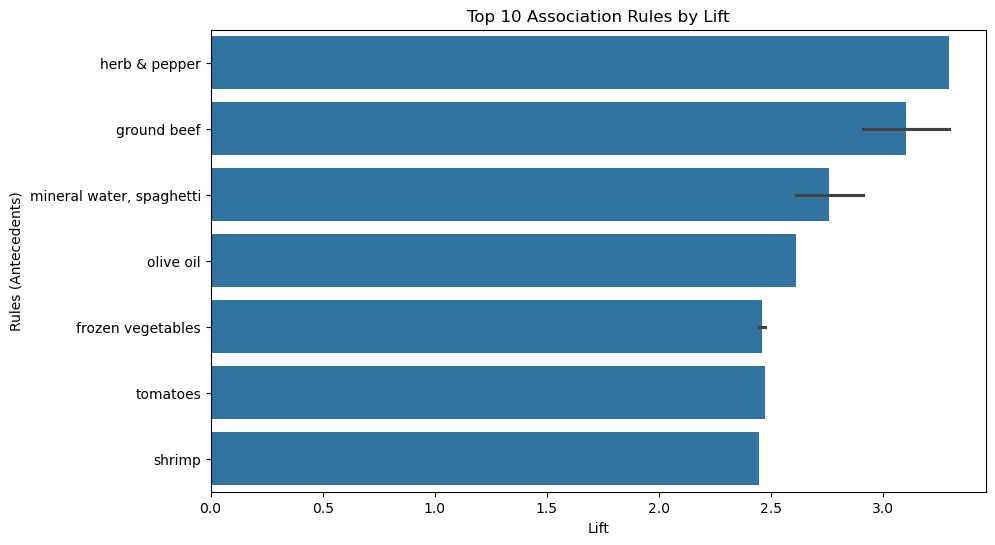

In [12]:
# Visualize the rules
# Sort rules by lift and select the top 10
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_rules['lift'], y=top_rules['antecedents'].apply(lambda x: ', '.join(list(x))))
plt.title("Top 10 Association Rules by Lift")
plt.xlabel("Lift")
plt.ylabel("Rules (Antecedents)")
plt.show()
